# This is the latency comparasion research of different RTP stream viewers
## Variants
Next aproaches is compared:
1. RPI gstreamer-kms gst:1.18.4; kernel: 5.15.61-v8+ aarch64;
2. RPI gstreamer-wayland gst:1.18.4; kernel: 5.15.61-v8+ aarch64;
3. OpenHD 2.3.1-evo-hotfix1
4. RPI WFB-ng pipeline
5. RPI gstreamer-kms NEW VERSION

All variants - Pi zero 2W  
RPI-preffexed variants - 64bit kernel, full-kms  
RTP stream provided by OpenIPC camera. 48FPS, 720p, FPV firmware version  
Display 60hz IPS

## Experiment procedure:
For each variant there is 3 runs.  
Each run is recorded with 200 FPS camera.  
In each run viewer and stream is restarted.  
For each run count of frames between LED ON in real and on-screan is measured by Kinovea software for 5 times

## Gstreamer pipelines:
### 1. KMS pipeline
```
gst-launch-1.0 udpsrc port=5600 caps='application/x-rtp, media=(string)video, clock-rate=(int)90000, encoding-name=(string)H264' ! rtpjitterbuffer latency=7 ! rtph264depay ! h264parse ! v4l2h264dec ! kmssink sync=false
```
### Wayland pipeline
```
gst-launch-1.0 -vvv udpsrc port=5600 caps='application/x-rtp, media=(string)video, clock-rate=(int)90000, encoding-name=(string)H264' ! rtpjitterbuffer latency=7 ! rtph264depay ! h264parse ! v4l2h264dec output-io-mode=dmabuf ! waylandsink fullscreen=true sync=false
```

Installed Packages Plotly.NET, 3.0.1 Plotly.NET.ImageExport, 3.0.1 Plotly.NET.Interactive, 3.0.1

<!-- Plotly chart will be drawn inside this DIV --> 


 
</div

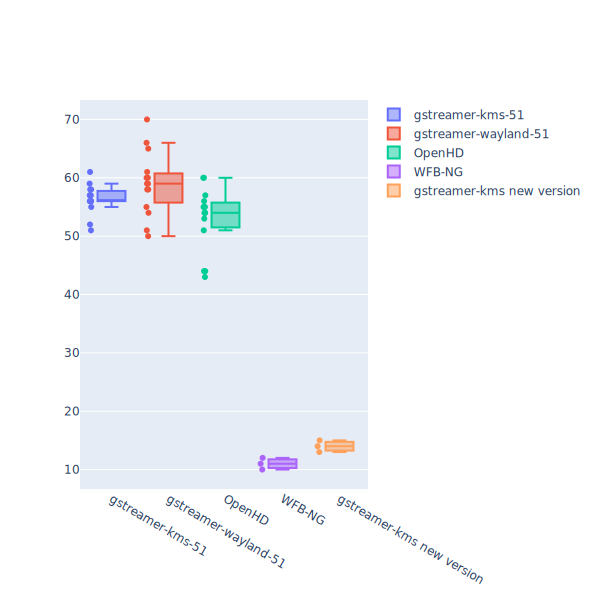

In [18]:
#r "nuget: Plotly.NET, 3.0.1"
#r "nuget: Plotly.NET.Interactive, 3.0.1"
#r "nuget: Plotly.NET.ImageExport"
open Plotly.NET 
open Plotly.NET.ImageExport

let gstreamerKms51     = [57;59;56;56;56;  51;55;56;52;57;  58;61;58;56;57]
let gstreamerWayland51 = [61;66;55;59;60;  65;60;51;59;50;  59;70;58;54;58]
let openHd             = [51;55;60;60;55;  54;57;55;44;44;  54;56;54;53;43]
let wfbNg = [10;11;12]
let gstreamerKms2 = [13;14;15]

let box =
    [
        Chart.BoxPlot("y" ,gstreamerKms51,Name="gstreamer-kms-51",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
        Chart.BoxPlot("y'",gstreamerWayland51,Name="gstreamer-wayland-51",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
        Chart.BoxPlot("y'",openHd,Name="OpenHD",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
        Chart.BoxPlot("y'",wfbNg,Name="WFB-NG",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
        Chart.BoxPlot("y'",gstreamerKms2,Name="gstreamer-kms new version",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
    ]
    |> Chart.combine

display(box)

let svgString =
    box
    |> Chart.toSVGString()


DisplayExtensions.DisplayAs(svgString,"image/svg+xml")

## Notes
### Installation
System update
```
sudo apt update
sudo apt upgrade
```

Gstreamer installation:
```
sudo apt install libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libgstreamer-plugins-bad1.0-dev gstreamer1.0-plugins-base gstreamer1.0-plugins-good gstreamer1.0-plugins-bad gstreamer1.0-plugins-ugly gstreamer1.0-libav gstreamer1.0-tools gstreamer1.0-x gstreamer1.0-alsa gstreamer1.0-gl gstreamer1.0-gtk3 gstreamer1.0-qt5 gstreamer1.0-pulseaudio
```

How to check Gstreamer version:
```
gst-launch-1.0 --gst-version
```

Installing wayland:
```
sudo apt install weston
``